# Use DESI Legacy Survey photo z



In [1]:
import pandas as pd
from astropy.table import Table, Column, vstack
from astropy.cosmology import Planck15
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.io import ascii

import urllib.request, json 

import time
import numpy as np
import pyvo as vo
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'
import matplotlib as mpl
import matplotlib.pyplot as plt

from selenium import webdriver

from herschelhelp_internal.masterlist import merge_catalogues, nb_merge_dist_plot
from herschelhelp.utils import clean_table

/Users/rs548/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/seaborn/apionly.py:9: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


## 2. Cross match to desi-photoz objects

In [2]:
cross_query = """
SELECT
    db.ID,
    db.RA,
    db.DEC,
    db.field,
    db.photo_z,
    db.photo_zerr
FROM desi_photoz.main AS db
WHERE db.field = 'HDF-N'
"""

# construct a service; I’ve taken the URL from TOPCAT’s
# TAP service browser # ("Selected TAP Service" near the
# foot of the dialog)
service = vo.dal.TAPService(
    "https://herschel-vos.phys.sussex.ac.uk/__system__/tap/run/tap"
)

In [3]:
job = service.submit_job(cross_query)
job.run()
job_url = job.url
job_result = vo.dal.tap.AsyncTAPJob(job_url)
start_time = time.time()
wait = 5.
while job.phase == 'EXECUTING':
    
    time.sleep(wait) #wait and try again
    #wait *= 2

print('Job {} running after {} seconds.'.format(job.phase, round(time.time() - start_time)))

result = job_result.fetch_result()
desi_photoz = result.table

Job COMPLETED running after 6 seconds.


In [4]:
desi_photoz = clean_table(desi_photoz)

Converting column id type from object to string
Converting column field type from object to string


In [5]:
desi_photoz.write('./data/HDF-N_DESI-DR7_Zou_et_al_2019_photo_z.fits', overwrite=True)

In [6]:
desi_photoz

id,ra,dec,field,photo_z,photo_zerr
,deg,deg,,,
str16,float64,float64,str5,float64,float64
6000623804000942,190.24476219878,62.1981469667525,HDF-N,0.4430289,0.16439219
6000623804000901,190.26055372086,62.1898761426091,HDF-N,0.6530283,0.13969338
6000623804000941,190.245479776596,62.1957045166356,HDF-N,0.0038381836,0.007313066
6000623804000753,190.299638070743,62.1852077369219,HDF-N,0.27679247,0.05387374
6000623804000681,190.286796611485,62.1762244681917,HDF-N,0.7530167,0.054065086
6000623804000548,190.295108277279,62.1667226571845,HDF-N,0.5034808,0.08370847
6000623804000865,190.286419271575,62.1870601274111,HDF-N,0.6994755,0.0998241
6000623804000667,190.280814414397,62.1775141960134,HDF-N,0.35283768,0.05246808


In [7]:
ml = Table.read('../../dmu1/dmu1_ml_HDF-N/data/master_catalogue_hdf-n_20180427.fits')

In [8]:
ml

ra,dec,m_ap_gpc1_g,merr_ap_gpc1_g,m_gpc1_g,merr_gpc1_g,m_ap_gpc1_r,merr_ap_gpc1_r,m_gpc1_r,merr_gpc1_r,m_ap_gpc1_i,merr_ap_gpc1_i,m_gpc1_i,merr_gpc1_i,m_ap_gpc1_z,merr_ap_gpc1_z,m_gpc1_z,merr_gpc1_z,m_ap_gpc1_y,merr_ap_gpc1_y,m_gpc1_y,merr_gpc1_y,f_ap_gpc1_g,ferr_ap_gpc1_g,f_gpc1_g,ferr_gpc1_g,flag_gpc1_g,f_ap_gpc1_r,ferr_ap_gpc1_r,f_gpc1_r,ferr_gpc1_r,flag_gpc1_r,f_ap_gpc1_i,ferr_ap_gpc1_i,f_gpc1_i,ferr_gpc1_i,flag_gpc1_i,f_ap_gpc1_z,ferr_ap_gpc1_z,f_gpc1_z,ferr_gpc1_z,flag_gpc1_z,f_ap_gpc1_y,ferr_ap_gpc1_y,f_gpc1_y,ferr_gpc1_y,flag_gpc1_y,f_acs_f435w,ferr_acs_f435w,f_acs_f606w,ferr_acs_f606w,f_acs_f775w,ferr_acs_f775w,f_acs_f814w,ferr_acs_f814w,f_acs_f850lp,ferr_acs_f850lp,f_wfc3_f105w,ferr_wfc3_f105w,f_wfc3_f125w,ferr_wfc3_f125w,f_wfc3_f140w,ferr_wfc3_f140w,f_wfc3_f160w,ferr_wfc3_f160w,f_moircs_k,ferr_moircs_k,m_acs_f435w,merr_acs_f435w,flag_acs_f435w,m_acs_f606w,merr_acs_f606w,flag_acs_f606w,m_acs_f775w,merr_acs_f775w,flag_acs_f775w,m_acs_f814w,merr_acs_f814w,flag_acs_f814w,m_acs_f850lp,merr_acs_f850lp,flag_acs_f850lp,m_wfc3_f105w,merr_wfc3_f105w,flag_wfc3_f105w,m_wfc3_f125w,merr_wfc3_f125w,flag_wfc3_f125w,m_wfc3_f140w,merr_wfc3_f140w,flag_wfc3_f140w,m_wfc3_f160w,merr_wfc3_f160w,flag_wfc3_f160w,m_moircs_k,merr_moircs_k,flag_moircs_k,m_ap_mosaic_u,merr_ap_mosaic_u,m_mosaic_u,merr_mosaic_u,m_ap_suprime_b,merr_ap_suprime_b,m_suprime_b,merr_suprime_b,m_ap_suprime_v,merr_ap_suprime_v,m_suprime_v,merr_suprime_v,m_ap_suprime_r,merr_ap_suprime_r,m_suprime_r,merr_suprime_r,m_ap_suprime_ip,merr_ap_suprime_ip,m_suprime_ip,merr_suprime_ip,m_ap_suprime_zp,merr_ap_suprime_zp,m_suprime_zp,merr_suprime_zp,m_ap_quirc_hk,merr_ap_quirc_hk,m_quirc_hk,merr_quirc_hk,f_ap_mosaic_u,ferr_ap_mosaic_u,f_mosaic_u,ferr_mosaic_u,flag_mosaic_u,f_ap_suprime_b,ferr_ap_suprime_b,f_suprime_b,ferr_suprime_b,flag_suprime_b,f_ap_suprime_v,ferr_ap_suprime_v,f_suprime_v,ferr_suprime_v,flag_suprime_v,f_ap_suprime_r,ferr_ap_suprime_r,f_suprime_r,ferr_suprime_r,flag_suprime_r,f_ap_suprime_ip,ferr_ap_suprime_ip,f_suprime_ip,ferr_suprime_ip,flag_suprime_ip,f_ap_suprime_zp,ferr_ap_suprime_zp,f_suprime_zp,ferr_suprime_zp,flag_suprime_zp,f_ap_quirc_hk,ferr_ap_quirc_hk,f_quirc_hk,ferr_quirc_hk,flag_quirc_hk,flag_cleaned,flag_merged,flag_gaia,stellarity,stellarity_origin,ebv,help_id,field,zspec,zspec_qual,zspec_association_flag,f_wircam_ks,ferr_wircam_ks,m_wircam_ks,merr_wircam_ks,flag_wircam_ks,f_irac_i1,ferr_irac_i1,m_irac_i1,merr_irac_i1,flag_irac_i1,f_irac_i2,ferr_irac_i2,m_irac_i2,merr_irac_i2,flag_irac_i2,f_irac_i3,ferr_irac_i3,m_irac_i3,merr_irac_i3,flag_irac_i3,f_irac_i4,ferr_irac_i4,m_irac_i4,merr_irac_i4,flag_irac_i4,flag_optnir_obs,flag_optnir_det,hp_idx
deg,deg,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,float64,float64,float64,bool,float64,float64,float64,float64,bool,float64,float64,float64,float64,bool,float64,float64,float64,float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,float64,bool,float64,float64,bool,float64,float64,bool,float64,float64,bool,float64,float64,bool,float64,float64,bool,float64,float64,bool,float64,float64,bool,float64,float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,float64,float64,float64,bool,float64,float64,float64,float64,bool,float64,float64,float64,float64,bool,float64,float64,float64,

/Users/rs548/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


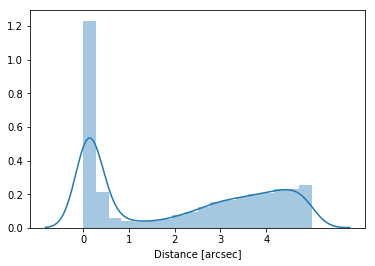

In [9]:
nb_merge_dist_plot(
    SkyCoord(ml['ra'], ml['dec']),
    SkyCoord(desi_photoz['ra'], desi_photoz['dec'])
)

In [10]:
# Given the graph above, we use 0.8 arc-second radius
desi_photoz['ra'].name = 'desi_ra'
desi_photoz['dec'].name = 'desi_dec'
photoz = merge_catalogues(ml, desi_photoz, "desi_ra", "desi_dec", radius=0.8*u.arcsec)

In [11]:
photoz['help_id'].fill_value = ''
photoz['photo_z'].fill_value = np.nan
photoz = photoz.filled()
has_help = photoz['help_id'] != ''
has_z = ~np.isnan(photoz['photo_z'])
photoz = photoz['help_id', 'id', 'photo_z', 'photo_zerr']
photoz[has_help & has_z].write('./data/HDF-N_DESI-DR7_Zou_et_al_2019_photo_z_withhelp_id.fits', overwrite=True)

In [12]:
photoz[has_help & has_z]

help_id,id,photo_z,photo_zerr
bytes27,str16,float64,float64
HELP_J123514.254+623018.767,6000624472001816,0.22424276,0.025223825
HELP_J123500.369+621215.677,6000623801001077,0.45043775,0.044182003
HELP_J123449.425+621737.858,6000623801002246,0.5419844,0.028566135
HELP_J123337.963+621140.815,6000623800000849,0.19628304,0.058482487
HELP_J123330.547+620936.937,6000623800000473,0.82949585,0.06961147
HELP_J123637.367+620006.988,6000623125001824,0.40684947,0.02555909
HELP_J123748.842+620315.732,6000623125002477,0.7185555,0.04856223
HELP_J123713.797+620020.396,6000623125001865,0.36626667,0.08166802
HELP_J123839.439+622023.961,6000623803002700,0.42141646,0.0838452
